Import required libraries

In [160]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter 

frequency = 'D'


In [161]:
def clean(df):
  df = df.reset_index()
  df.index = df['time']
  df.index = pd.to_datetime(df.index)
  maximums = df.resample(frequency).max()
  minimums = df.resample(frequency).min()
  return pd.concat([maximums, minimums])

def read_and_clean(file_path):
  df = pd.read_csv(file_path, parse_dates=True)
  return clean(df)

In [162]:
file_paths = ['data/Stockholm.csv', 'data/London.csv', 'data/Durban.csv', 'data/Oslo.csv', 'data/Cape Town.csv'	]
df_list = [read_and_clean(file_path) for file_path in file_paths]
df = pd.concat(df_list)
df = df.reset_index(drop=True)
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.strftime('%Y-%m-%d')
df

,index,time,temperature,snowfall,city,date
0,23,2022-01-01 23:00:00,0.1,0.63,Stockholm,2022-01-01
1,47,2022-01-02 23:00:00,4.1,1.19,Stockholm,2022-01-02
2,71,2022-01-03 23:00:00,4.0,0.00,Stockholm,2022-01-03
3,95,2022-01-04 23:00:00,3.9,0.00,Stockholm,2022-01-04
4,119,2022-01-05 23:00:00,-0.0,0.14,Stockholm,2022-01-05
...,...,...,...,...,...,...
3645,8640,2022-12-27 00:00:00,NaN,NaN,Cape Town,2022-12-27
3646,8664,2022-12-28 00:00:00,NaN,NaN,Cape Town,2022-12-28
3647,8688,2022-12-29 00:00:00,NaN,NaN,Cape Town,2022-12-29
3648,8712,2022-12-30 00:00:00,NaN,NaN,Cape Town,2022-12-30


Set the time column as the index  and convert to datetime, then resample the data for daily frequency

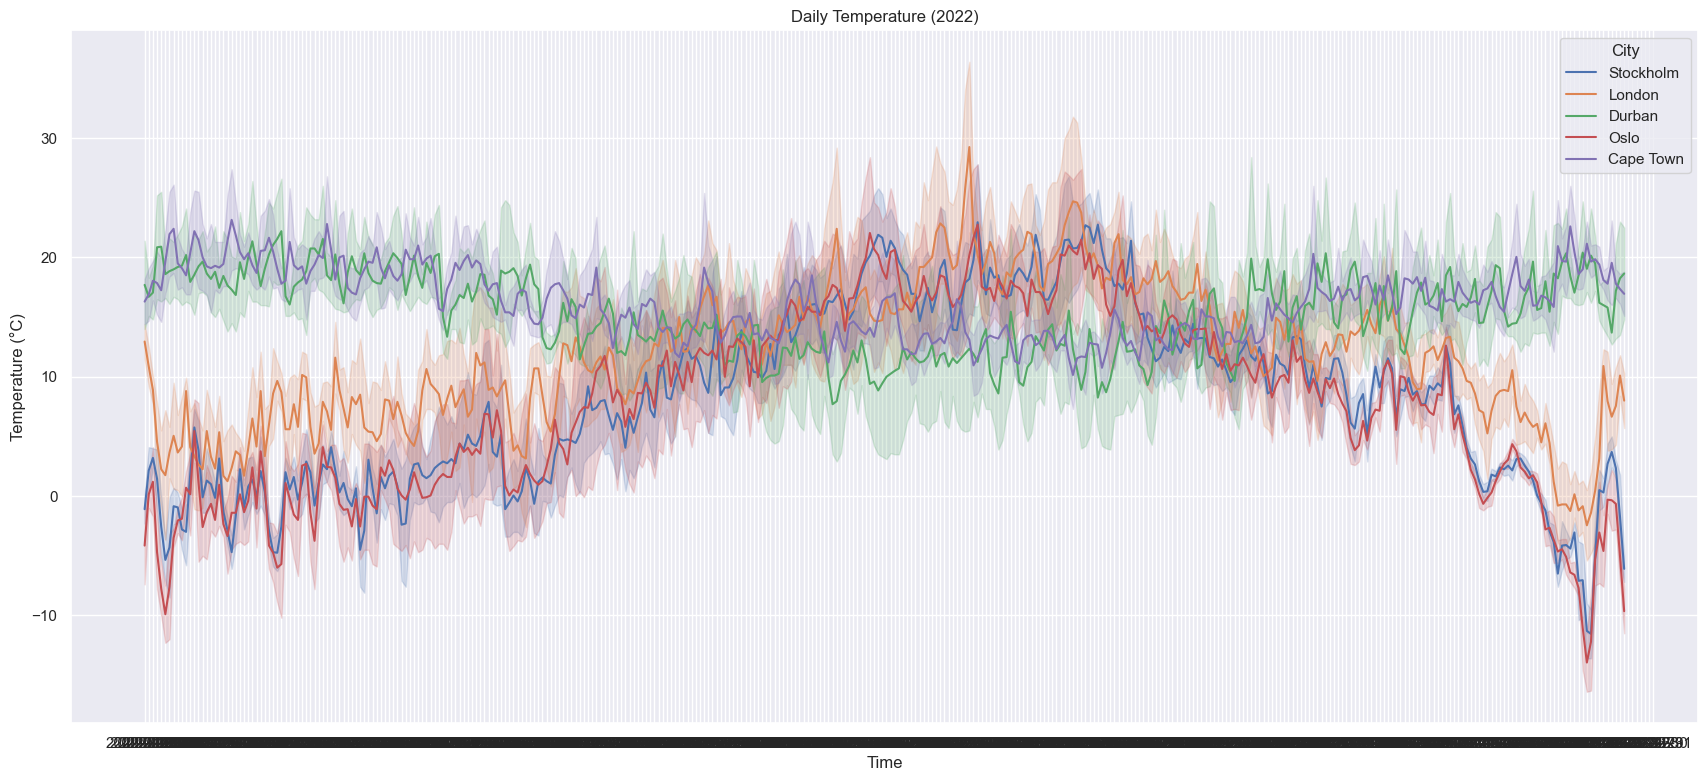

In [163]:
plt.figure(figsize=(21, 9))

# Set the style of the plot
sns.set_theme()

sns.lineplot(
    data=df, 
    hue="city", 
    x="date", 
    y="temperature"
)

# Add axis labels and a title
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend().set_title("City")

# Show the plot
plt.title("Daily Temperature (2022)")
plt.show()
